In [4]:
import pandas as pd
import numpy as np

import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split


from warnings import filterwarnings

%matplotlib inline
filterwarnings('ignore')

In [6]:
init_df = pd.read_csv("housing.csv")

In [7]:
init_df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [8]:
init_df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

RM: Average number of rooms per dwelling

LSTAT: Percentage of population considered lower status

PTRATIO: Pupil-teacher ratio by town

MEDV: Median value of owner-occupied homes in $1000's

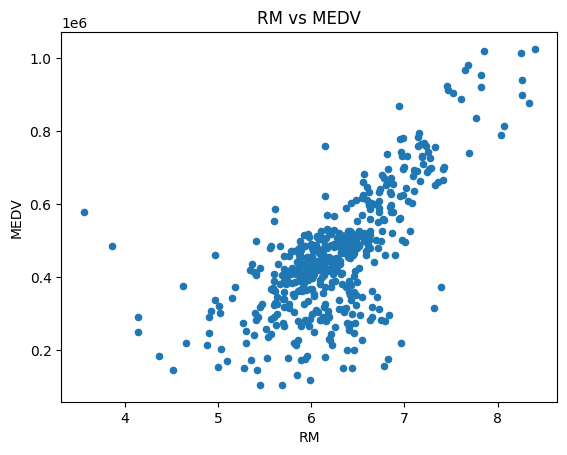

In [9]:
init_df.plot(x='RM', y='MEDV', kind='scatter')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('RM vs MEDV')
plt.show()


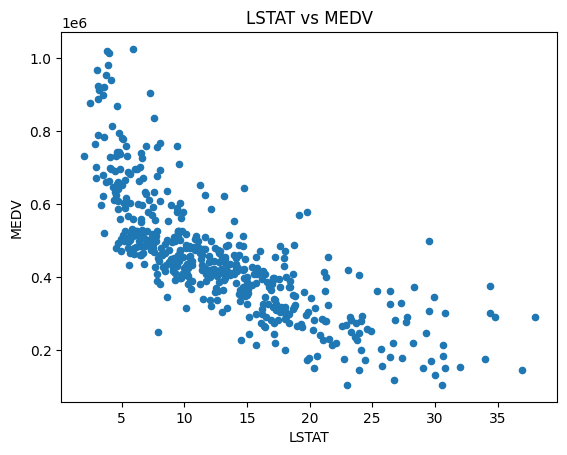

In [10]:
init_df.plot(x='LSTAT', y='MEDV', kind='scatter')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('LSTAT vs MEDV')
plt.show()


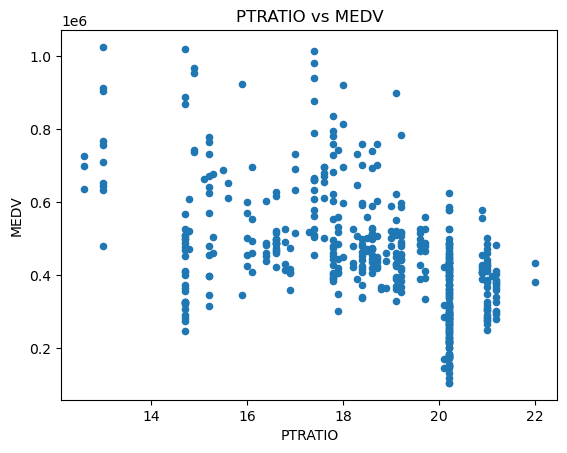

In [7]:
init_df.plot(x='PTRATIO', y='MEDV', kind='scatter')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.title('PTRATIO vs MEDV')
plt.show()


In [12]:
X = init_df.drop('MEDV', axis=1)
y = init_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


perceptron = Perceptron()

perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_train)
y_pred_test = perceptron.predict(X_test)

In [17]:
PERCENT = 0.3

lower_bound = y_train[:len(y_train)] * (1 - PERCENT)
upper_bound = y_train[:len(y_train)] * (1 + PERCENT)

successful_guesses = ((y_pred >= lower_bound) & (y_pred <= upper_bound)).sum()

accuracy = successful_guesses / len(y_pred)

print("Successful Guesses: {}".format(successful_guesses))
print("Accuracy: {}".format(accuracy))

Successful Guesses: 260
Accuracy: 0.6649616368286445


In [18]:
lower_bound = y_test[:len(y_test)] * (1 - PERCENT)
upper_bound = y_test[:len(y_test)] * (1 + PERCENT)

successful_guesses = ((y_pred_test >= lower_bound) & (y_pred_test <= upper_bound)).sum()

accuracy = successful_guesses / len(y_pred_test)

print("Successful Guesses: {}".format(successful_guesses))
print("Accuracy: {}".format(accuracy))

Successful Guesses: 55
Accuracy: 0.5612244897959183


In [20]:
std_dev = np.std(y_pred)
std_dev_test = np.std(y_pred_test)
print("Standard Deviation of Predictions: {}".format(std_dev))
print("Standard Deviation of Test Predictions: {}".format(std_dev_test))

Standard Deviation of Predictions: 170319.45889602962
Standard Deviation of Test Predictions: 171495.35797251904


In [21]:
std_dev_percent = (np.std(y_pred) / np.mean(y_pred)) * 100
std_dev_test_percent = (np.std(y_pred_test) / np.mean(y_pred_test)) * 100

print("Standard Deviation as Percentage of Deviation of Predictions: {}%".format(std_dev_percent))
print("Standard Deviation as Percentage of Deviation of Test Predictions: {}%".format(std_dev_test_percent))


Standard Deviation as Percentage of Deviation of Predictions: 35.36546761573787%
Standard Deviation as Percentage of Deviation of Test Predictions: 36.44240565267621%
